# There are three steps in this program:
    Step1：Capture images from the camera;
    Step2：Detect Faces from the images;
              If face exists in the images:
                  Crop and show the face 
              Else:
                  Show there is no face
    Step3: If the button 0 will be pressed, stop the program; Otherwise, the above two steps will be repeated.
    Note:  Please save this program in the directory: "/home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/

In [5]:
# In this cell, some libraries were imported
import cv2
import sys
import os
from PIL import Image, ImageDraw
import pylab
import time
from matplotlib import pyplot as plt
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")
filepath ="/home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/images/"
if not os.path.exists(filepath):
    os.makedirs(filepath)

In [16]:
def capture(destination, image_number):
    orig_img_path = destination + str(image_number)+'.JPG'
    !fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null

In [17]:
# Face Detection Function
def detectFaces(image_name):
    #print ("Face Detection Start.")
    # Read the image and convert to gray to reduce the data
    img = cv2.imread(image_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Color => Gray
    
    # The haarcascades classifier is used to train data
    face_cascade = cv2.CascadeClassifier("/usr/share/opencv/haarcascades/haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)#1.3 and 5are the min and max windows of the treatures
    result = []
    for (x,y,width,height) in faces:
        result.append((x,y,x+width,y+height))
    #print ("Face Detection Complete.")
    return result

In [18]:
def draw(image):
    img_ori = Image.open(image)
    plt.imshow(img_ori),plt.show()

In [19]:
#Crop faces and save them in the same directory
def crop():
    filepath ="/home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/images/"
    dir_path ="/home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/"
    filecount = len(os.listdir(filepath))-1
    image_count = 1#count is the number of images
    face_cascade = cv2.CascadeClassifier("/usr/share/opencv/haarcascades/haarcascade_frontalface_default.xml")
    for fn in os.listdir(filepath): 
        start = time.time()
        if image_count <= filecount:
            image_name = str(image_count) + '.JPG'
            image_path = filepath + image_name
            image_new = dir_path + image_name
            #print (image_path)
            #print (image_new)
            os.system('cp '+(image_path)+ (' /home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/'))
            faces = detectFaces(image_name)
            if not faces:
                print ("There is no face!Trust me!!!")
            if faces:
                #All croped face images will be saved in a subdirectory
                face_name = image_name.split('.')[0]
                #os.mkdir(save_dir)
                count = 0
                for (x1,y1,x2,y2) in faces:
                    file_name = os.path.join(dir_path,face_name+str(count)+".jpg")
                    face_name = os.path.basename(file_name)
                    Image.open(image_name).crop((x1,y1,x2,y2)).save(file_name)
                    count+=1    
                    print("Haha, Here is one face:")
                    draw(file_name)
                #print("The " + str(image_count) +" image were done.")
                #print("Congratulation! The total of the " + str(count) + " faces in the " +str(image_count) + " image.")
                os.system('rm -rf '+(image_path))
            os.system('rm -rf '+(image_new))
        end = time.time()
        TimeSpan = end - start
        if image_count <= filecount:
            print ("The time of " + str(image_count) + " image is " +str(TimeSpan) + " s.")
        image_count = image_count + 1    

In [20]:
def main():
    while(base.buttons[0].read()==0):
        image_number = 1
        filepath ="/home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/images/"
        capture(filepath, image_number)
        crop()

Haha, Here is one face:


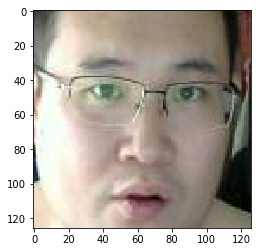

The time of 1 image is 3.731421947479248 s.
Haha, Here is one face:


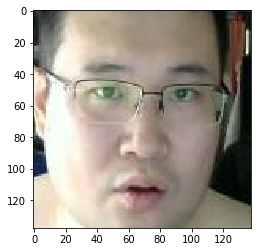

The time of 1 image is 2.4100992679595947 s.
There is no face!Trust me!!!
The time of 1 image is 0.7363932132720947 s.
There is no face!Trust me!!!
The time of 1 image is 0.7122640609741211 s.
There is no face!Trust me!!!
The time of 1 image is 0.7151565551757812 s.
Haha, Here is one face:


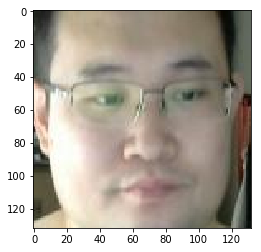

The time of 1 image is 2.4691379070281982 s.
Haha, Here is one face:


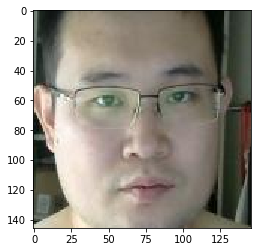

The time of 1 image is 2.501715660095215 s.
Haha, Here is one face:


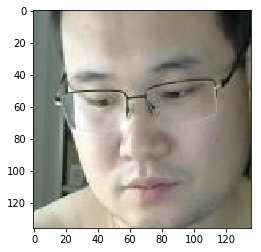

The time of 1 image is 2.478020191192627 s.


In [21]:
main()